In [1]:
using Plots
using JLD2 
using LatticeAlgorithms
using BlockDiagonals

# Fig 3a for fidelity

In [2]:
## Load the data
Nmin = 1
Nmax = 30
fn = "data/repetition_codes/fidelity_time_rep_rec_$(Nmin)_$(Nmax).jld2";
datalist = load(fn)
Nrange = datalist["Nrange"]
σrange = datalist["σrange"]

p0list = []
timelist = []
for item in datalist["datalist"]
    push!(p0list, item[1])
    push!(timelist, item[2])    
end

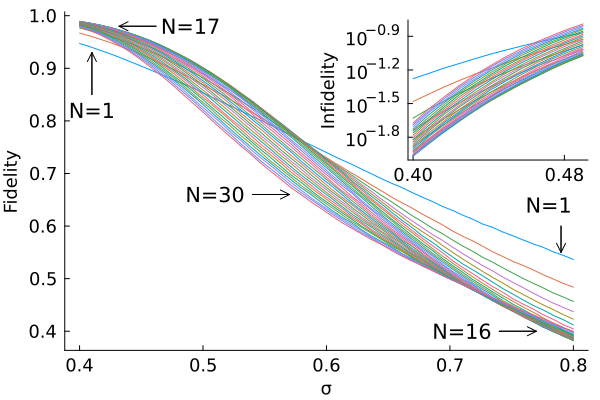

In [3]:
plot()
ind1 = 1
ind2 = 12
xlabel!("σ")
ylabel!("Fidelity")
for ind = 1 : length(Nrange)
    plot!(σrange, [p0[ind] for p0 in p0list], label="N=$Nrange[ind]")
    
    if ind==1
        plot!(σrange[ind1:ind2], 
            [1-p0[ind] for p0 in p0list][ind1:ind2], 
            inset = bbox(0.02, 0.6, 0.3, 0.35, :bottom, :right),
            subplot = 2,            
            grid = false,
            legend=false            
        )
    else
        plot!(σrange[ind1:ind2], 
            [1-p0[ind] for p0 in p0list][ind1:ind2], 
            subplot = 2,            
            grid = false,
            legend=false
        )        
    end         
end
plot!(grid=false, tickfontsize=12, labelfontsize=12, legend=false)
plot!(yaxis=:log, subplot=2, ylabel="Infidelity")

plot!([0.74,0.77],[0.40, 0.40],arrow=true,color=:black,linewidth=1)
annotate!(0.71, 0.40, "N=16")

plot!([0.79,0.79],[0.6, 0.55],arrow=true,color=:black,linewidth=1)
annotate!(0.78, 0.64, "N=1")

plot!([0.41,0.41],[0.85, 0.93],arrow=true,color=:black,linewidth=1)
annotate!(0.41, 0.82, "N=1")

plot!([0.54,0.57],[0.66, 0.66],arrow=true,color=:black,linewidth=1)
annotate!(0.51, 0.66, "N=30")

plot!([0.462,0.432],[0.98, 0.98],arrow=true,color=:black,linewidth=1)
annotate!(0.49, 0.98, "N=17")

plot!(xticks=[0.40, 0.48], subplot=2)

In [4]:
savefig("plots/fidelity_rep_rec.pdf") ; 

# Fig 3b for runtime

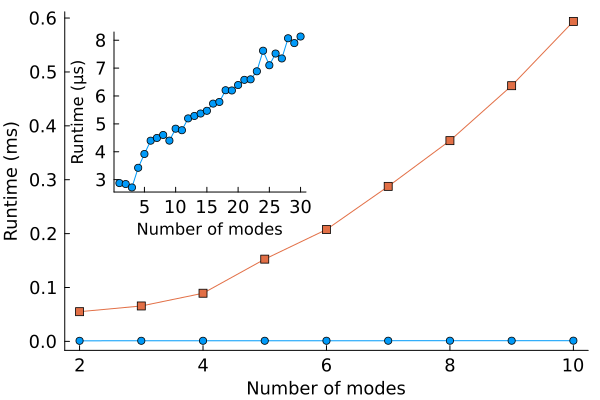

In [5]:
data = load("data/repetition_codes/runtime_rep_rec.jld2")
Nrange = data["Nrange"]
time_exp = data["time_exp"]
time_linear = data["time_linear"];

ind = 2
plot(Nrange[ind:end], time_linear[ind:end]*1e3, marker=:circle, label="Linear decoder", legend=false)
plot!(Nrange[ind:end], time_exp[ind:end]*1e3, marker=:square, label="Conventional decoder", legend=false)


xlabel!("Number of modes")
# ylabel!("Runtime (" * L"10^{-3}" * "second)")
ylabel!("Runtime (ms)")
plot!(grid=false, tickfontsize=12, labelfontsize=12, legend=false)



plot!(1:30, sum(timelist)/length(σrange)*1e6, marker=:circle, legend = false,
    inset = bbox(0.49, 0.52, 0.32, 0.4, :bottom, :right),
    subplot = 2,
    grid=false,
    tickfontsize=12,
    xlabel="Number of modes",
    ylabel="Runtime (μs)"
)


In [6]:
savefig("plots/runtime_rep_rec.pdf") ; 